Тест хийсэн хэсэг

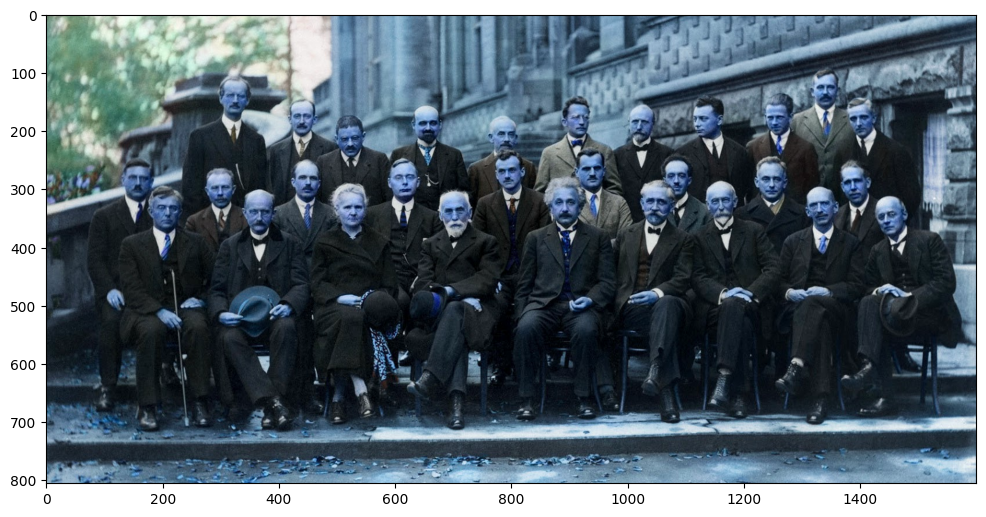

In [4]:
import os

import cv2
from matplotlib import pyplot as plt


def show_detection(image, faces):
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 5)
    return image


def show_img(img, cmap=None):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)


base_dir = "C:\\Users\\gerel\\PycharmProjects\\Image-process"
image_path = os.path.join(base_dir, 'images', 'solvay_conference.jpg')
img = cv2.imread(image_path)
show_img(img)

In [3]:
import numpy as np

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Load cascade classifiers:
cas_alt2 = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
cas_default = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
# Detect faces:
faces_alt2 = cas_alt2.detectMultiScale(gray)
faces_default = cas_default.detectMultiScale(gray)
retval, faces_haar_alt2 = cv2.face.getFacesHAAR(img,
                                                "haarcascade_frontalface_alt2.xml")
faces_haar_alt2 = np.squeeze(faces_haar_alt2)
retval, faces_haar_default = cv2.face.getFacesHAAR(img,
                                                   "haarcascade_frontalface_default.xml")
faces_haar_default = np.squeeze(faces_haar_default)
# Draw face detections:
img_faces_alt2 = show_detection(img.copy(), faces_alt2)
img_faces_default = show_detection(img.copy(), faces_default)
img_faces_haar_alt2 = show_detection(img.copy(), faces_haar_alt2)
img_faces_haar_default = show_detection(img.copy(), faces_haar_default)
show_img(img_faces_alt2)
show_img(img_faces_default)
show_img(img_faces_haar_alt2)
show_img(img_faces_haar_default)

NameError: name 'cv2' is not defined

 Video хийсэн кодын хэсэг

In [ ]:
import cv2
import dlib
import numpy as np

cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
writer = cv2.VideoWriter('video/video_1.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 30, (width, height))

# Load the detector and predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        points = np.array([[p.x, p.y] for p in landmarks.parts()], np.int32)
        hull = cv2.convexHull(points)

        mask = np.zeros_like(gray)
        cv2.fillConvexPoly(mask, hull, 255)

        frame_blurred = cv2.GaussianBlur(frame, (99, 99), 30)
        frame = np.where(mask[:, :, None].astype(bool), frame_blurred, frame)

    cv2.imshow("Output", frame)
    writer.write(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
writer.release()
cv2.destroyAllWindows()
